In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import os

In [2]:
headers = {
        "User-Agent": "wuyang.gao@mail.utoronto.ca"
    }

In [3]:
# fetch the company cik number
companyTickers = requests.get(
    "https://www.sec.gov/files/company_tickers.json",
    headers = headers
)

In [4]:
companyTickers.json()['0']

{'cik_str': 320193, 'ticker': 'AAPL', 'title': 'Apple Inc.'}

In [5]:
companyData = pd.DataFrame.from_dict(companyTickers.json(), orient='index')

In [6]:
companyData.head()

,cik_str,ticker,title
0,320193,AAPL,Apple Inc.
1,1045810,NVDA,NVIDIA CORP
2,789019,MSFT,MICROSOFT CORP
3,1652044,GOOGL,Alphabet Inc.
4,1018724,AMZN,AMAZON COM INC


In [7]:
companyData.shape

(10104, 3)

In [8]:
companyData['cik_str'] = companyData['cik_str'].astype(str).str.zfill(10)

In [9]:
companyData.head()

,cik_str,ticker,title
0,0000320193,AAPL,Apple Inc.
1,0001045810,NVDA,NVIDIA CORP
2,0000789019,MSFT,MICROSOFT CORP
3,0001652044,GOOGL,Alphabet Inc.
4,0001018724,AMZN,AMAZON COM INC


In [10]:
companyData.to_csv('datasets/company_data.csv', index=False)

In [29]:
companyData = pd.read_csv('datasets/company_data.csv')

In [30]:
companyData.head(10)


,cik_str,ticker,title
0,320193,AAPL,Apple Inc.
1,789019,MSFT,MICROSOFT CORP
2,1045810,NVDA,NVIDIA CORP
3,1652044,GOOGL,Alphabet Inc.
4,1018724,AMZN,AMAZON COM INC
5,1326801,META,"Meta Platforms, Inc."
6,1067983,BRK-B,BERKSHIRE HATHAWAY INC
7,1046179,TSM,TAIWAN SEMICONDUCTOR MANUFACTURING CO LTD
8,1730168,AVGO,Broadcom Inc.
9,1318605,TSLA,"Tesla, Inc."


In [31]:
companyData['cik_str'] = companyData['cik_str'].astype(str).str.zfill(10)

In [32]:
companyData.head(10)

,cik_str,ticker,title
0,0000320193,AAPL,Apple Inc.
1,0000789019,MSFT,MICROSOFT CORP
2,0001045810,NVDA,NVIDIA CORP
3,0001652044,GOOGL,Alphabet Inc.
4,0001018724,AMZN,AMAZON COM INC
5,0001326801,META,"Meta Platforms, Inc."
6,0001067983,BRK-B,BERKSHIRE HATHAWAY INC
7,0001046179,TSM,TAIWAN SEMICONDUCTOR MANUFACTURING CO LTD
8,0001730168,AVGO,Broadcom Inc.
9,0001318605,TSLA,"Tesla, Inc."


In [33]:
target_company_data = companyData[companyData['ticker'].isin(['AAPL', 'MSFT', 'NVDA', 'GOOGL', 'AMZN', 'META', 'TSLA'])]

In [34]:
target_company_data = target_company_data.set_index('ticker')

In [35]:
target_company_data

,cik_str,title
ticker,,
AAPL,0000320193,Apple Inc.
MSFT,0000789019,MICROSOFT CORP
NVDA,0001045810,NVIDIA CORP
GOOGL,0001652044,Alphabet Inc.
AMZN,0001018724,AMAZON COM INC
META,0001326801,"Meta Platforms, Inc."
TSLA,0001318605,"Tesla, Inc."


In [36]:
# First, we extract for Apple
cik = target_company_data.loc['AAPL','cik_str']
cik

'0000320193'

In [37]:
filingMetadata = requests.get(
    f'https://data.sec.gov/submissions/CIK{cik}.json', 
    headers = headers
)

In [38]:
f'https://data.sec.gov/submissions/CIK{cik}.json'

'https://data.sec.gov/submissions/CIK0000320193.json'

In [39]:
filingMetadata

<Response [200]>

In [40]:
list(filingMetadata.json().keys())

['cik',
 'entityType',
 'sic',
 'sicDescription',
 'ownerOrg',
 'insiderTransactionForOwnerExists',
 'insiderTransactionForIssuerExists',
 'name',
 'tickers',
 'exchanges',
 'ein',
 'description',
 'website',
 'investorWebsite',
 'category',
 'fiscalYearEnd',
 'stateOfIncorporation',
 'stateOfIncorporationDescription',
 'addresses',
 'phone',
 'flags',
 'formerNames',
 'filings']

In [41]:
filingMetadata.json()['sicDescription'], filingMetadata.json()['insiderTransactionForOwnerExists'], filingMetadata.json()['tickers']

('Electronic Computers', 0, ['AAPL'])

In [43]:
filingMetadata.json()['category'] 

'Large accelerated filer'

In [44]:
filingMetadata.json()['filings']

{'recent': {'accessionNumber': ['0000320193-24-000114',
   '0001958244-24-005135',
   '0000320193-24-000112',
   '0000320193-24-000111',
   '0000320193-24-000110',
   '0000320193-24-000109',
   '0000320193-24-000108',
   '0001950047-24-007542',
   '0001973141-24-000479',
   '0001959173-24-006827',
   '0001973141-24-000478',
   '0000320193-24-000102',
   '0000320193-24-000101',
   '0000320193-24-000100',
   '0000320193-24-000099',
   '0000320193-24-000098',
   '0000320193-24-000097',
   '0000320193-24-000096',
   '0001140361-24-040659',
   '0001140361-24-038601',
   '0001140361-24-038403',
   '0000320193-24-000088',
   '0000320193-24-000086',
   '0000320193-24-000084',
   '0001950047-24-005824',
   '0000320193-24-000081',
   '0000320193-24-000080',
   '0000320193-24-000075',
   '0001921094-24-000702',
   '0000320193-24-000073',
   '0000000000-24-005673',
   '0000320193-24-000071',
   '0001140361-24-024352',
   '0000320193-24-000069',
   '0000320193-24-000067',
   '0000320193-24-000061',

In [45]:
filingMetadata.json()['filings'].keys()

dict_keys(['recent', 'files'])

In [46]:
filingMetadata.json()['filings']['recent']

{'accessionNumber': ['0000320193-24-000114',
  '0001958244-24-005135',
  '0000320193-24-000112',
  '0000320193-24-000111',
  '0000320193-24-000110',
  '0000320193-24-000109',
  '0000320193-24-000108',
  '0001950047-24-007542',
  '0001973141-24-000479',
  '0001959173-24-006827',
  '0001973141-24-000478',
  '0000320193-24-000102',
  '0000320193-24-000101',
  '0000320193-24-000100',
  '0000320193-24-000099',
  '0000320193-24-000098',
  '0000320193-24-000097',
  '0000320193-24-000096',
  '0001140361-24-040659',
  '0001140361-24-038601',
  '0001140361-24-038403',
  '0000320193-24-000088',
  '0000320193-24-000086',
  '0000320193-24-000084',
  '0001950047-24-005824',
  '0000320193-24-000081',
  '0000320193-24-000080',
  '0000320193-24-000075',
  '0001921094-24-000702',
  '0000320193-24-000073',
  '0000000000-24-005673',
  '0000320193-24-000071',
  '0001140361-24-024352',
  '0000320193-24-000069',
  '0000320193-24-000067',
  '0000320193-24-000061',
  '0000320193-24-000058',
  '0000320193-24-00

In [47]:
filingMetadata.json()['filings']['recent'].keys()

dict_keys(['accessionNumber', 'filingDate', 'reportDate', 'acceptanceDateTime', 'act', 'form', 'fileNumber', 'filmNumber', 'items', 'core_type', 'size', 'isXBRL', 'isInlineXBRL', 'primaryDocument', 'primaryDocDescription'])

In [48]:
allForms = pd.DataFrame.from_dict(
    filingMetadata.json()['filings']['recent']
)

In [ ]:
def find_recent_filings(cik):
    

In [49]:
allForms.head(20)

,accessionNumber,filingDate,reportDate,acceptanceDateTime,act,form,fileNumber,filmNumber,items,core_type,size,isXBRL,isInlineXBRL,primaryDocument,primaryDocDescription
0,0000320193-24-000114,2024-10-08,2024-10-04,2024-10-08T18:30:13.000Z,,4,,,,4,5246,0,0,xslF345X05/wk-form4_1728426607.xml,FORM 4
1,0001958244-24-005135,2024-10-04,,2024-10-04T17:04:02.000Z,33,144,001-36743,241355561,,144,5409,0,0,xsl144X01/primary_doc.xml,
2,0000320193-24-000112,2024-10-03,2024-10-01,2024-10-03T18:31:01.000Z,,4,,,,4,15107,0,0,xslF345X05/wk-form4_1727994654.xml,FORM 4
3,0000320193-24-000111,2024-10-03,2024-10-01,2024-10-03T18:30:50.000Z,,4,,,,4,10988,0,0,xslF345X05/wk-form4_1727994644.xml,FORM 4
4,0000320193-24-000110,2024-10-03,2024-10-01,2024-10-03T18:30:40.000Z,,4,,,,4,20468,0,0,xslF345X05/wk-form4_1727994634.xml,FORM 4
5,0000320193-24-000109,2024-10-03,2024-10-01,2024-10-03T18:30:30.000Z,,4,,,,4,18949,0,0,xslF345X05/wk-form4_1727994624.xml,FORM 4
6,0000320193-24-000108,2024-10-03,2024-10-01,2024-10-03T18:30:20.000Z,,4,,,,4,14852,0,0,xslF345X05/wk-form4_1727994612.xml,FORM 4
7,0001950047-24-007542,2024-10-02,,2024-10-02T16:20:05.000Z,33,144,001-36743,241347647,,144,5558,0,0,xsl144X01/primary_doc.xml,
8,0001973141-24-000479,2024-10-02,,2024-10-02T16:17:54.000Z,33,144,001-36743,241347590,,144,4513,0,0,xsl144X01/primary_doc.xml,
9,0001959173-24-006827,2024-10-02,,2024-10-02T16:05:41.000Z,33,144,001-36743,241347271,,144,4661,0,0,xsl144X01/primary_doc.xml,


In [50]:
# Here, if we only look at 10-K submission
annaul_resport_df = allForms[allForms['form']=='10-K']

In [51]:
annaul_resport_df

,accessionNumber,filingDate,reportDate,acceptanceDateTime,act,form,fileNumber,filmNumber,items,core_type,size,isXBRL,isInlineXBRL,primaryDocument,primaryDocDescription
91,0000320193-23-000106,2023-11-03,2023-09-30,2023-11-02T18:08:27.000Z,34,10-K,001-36743,231373899,,XBRL,9569569,1,1,aapl-20230930.htm,10-K
169,0000320193-22-000108,2022-10-28,2022-09-24,2022-10-27T18:01:14.000Z,34,10-K,001-36743,221338448,,XBRL,10332356,1,1,aapl-20220924.htm,10-K
244,0000320193-21-000105,2021-10-29,2021-09-25,2021-10-28T18:04:28.000Z,34,10-K,001-36743,211359752,,XBRL,10502096,1,1,aapl-20210925.htm,10-K
313,0000320193-20-000096,2020-10-30,2020-09-26,2020-10-29T18:06:25.000Z,34,10-K,001-36743,201273977,,XBRL,12502600,1,1,aapl-20200926.htm,10-K
384,0000320193-19-000119,2019-10-31,2019-09-28,2019-10-30T18:12:36.000Z,34,10-K,001-36743,191181423,,XBRL,12861616,1,1,a10-k20199282019.htm,10-K
454,0000320193-18-000145,2018-11-05,2018-09-29,2018-11-05T08:01:40.000Z,34,10-K,001-36743,181158788,,10-K,12275572,1,0,a10-k20189292018.htm,10-K
542,0000320193-17-000070,2017-11-03,2017-09-30,2017-11-03T08:01:37.000Z,34,10-K,001-36743,171174673,,10-K,14071062,1,0,a10-k20179302017.htm,10-K
687,0001628280-16-020309,2016-10-26,2016-09-24,2016-10-26T16:42:16.000Z,34,10-K,001-36743,161953070,,10-K,13277662,1,0,a201610-k9242016.htm,10-K
804,0001193125-15-356351,2015-10-28,2015-09-26,2015-10-28T16:31:09.000Z,34,10-K,001-36743,151180619,,10-K,9594425,1,0,d17062d10k.htm,FORM 10-K
933,0001193125-14-383437,2014-10-27,2014-09-27,2014-10-27T17:11:55.000Z,34,10-K,000-10030,141175110,,10-K,12082626,1,0,d783162d10k.htm,10-K


In [52]:
accession_number = annaul_resport_df.iloc[0,0]
primary_document = annaul_resport_df.iloc[0,13]

In [53]:
accession_number, primary_document

('0000320193-23-000106', 'aapl-20230930.htm')

In [54]:
doc_url = f'https://www.sec.gov/Archives/edgar/data/{cik}/{accession_number.replace("-", "")}/{primary_document}'


In [55]:
doc_url

'https://www.sec.gov/Archives/edgar/data/0000320193/000032019323000106/aapl-20230930.htm'

In [56]:
response_doc = requests.get(doc_url, headers=headers)


In [29]:
file_path = os.path.join('datasets/filings', primary_document)

if response_doc.status_code == 200:
    # Step 3: Save the document locally
    with open(file_path, 'wb') as file:
        file.write(response_doc.content)
    print(f'Successfully downloaded: {primary_document}')
else:
    print(f'Failed to download document. Status code: {response_doc.status_code}')

Successfully downloaded: aapl-20230930.htm


In [57]:
# here for companyFacts
companyFacts = requests.get(
    f'https://data.sec.gov/api/xbrl/companyfacts/CIK{cik}.json',
    headers = headers
)

In [58]:
companyFacts.json().keys()

dict_keys(['cik', 'entityName', 'facts'])

In [59]:
companyFacts.json()['facts'].keys()

dict_keys(['dei', 'us-gaap'])

In [60]:
companyFacts.json()['facts']['dei'].keys()

dict_keys(['EntityCommonStockSharesOutstanding', 'EntityPublicFloat'])

In [65]:
companyFacts.json()['facts']['dei']['EntityPublicFloat']

{'label': 'Entity Public Float',
 'description': "The aggregate market value of the voting and non-voting common equity held by non-affiliates computed by reference to the price at which the common equity was last sold, or the average bid and asked price of such common equity, as of the last business day of the registrant's most recently completed second fiscal quarter.",
 'units': {'USD': [{'end': '2009-03-28',
    'val': 94593000000,
    'accn': '0001193125-09-153165',
    'fy': 2009,
    'fp': 'Q3',
    'form': '10-Q',
    'filed': '2009-07-22'},
   {'end': '2009-03-28',
    'val': 94593000000,
    'accn': '0001193125-09-214859',
    'fy': 2009,
    'fp': 'FY',
    'form': '10-K',
    'filed': '2009-10-27'},
   {'end': '2009-03-28',
    'val': 94593000000,
    'accn': '0001193125-10-012091',
    'fy': 2009,
    'fp': 'FY',
    'form': '10-K/A',
    'filed': '2010-01-25',
    'frame': 'CY2009Q1I'},
   {'end': '2010-03-27',
    'val': 208565000000,
    'accn': '0001193125-10-238044',


In [68]:
companyFacts.json()['facts']['dei']['EntityPublicFloat']['units']['USD']

[{'end': '2009-03-28',
  'val': 94593000000,
  'accn': '0001193125-09-153165',
  'fy': 2009,
  'fp': 'Q3',
  'form': '10-Q',
  'filed': '2009-07-22'},
 {'end': '2009-03-28',
  'val': 94593000000,
  'accn': '0001193125-09-214859',
  'fy': 2009,
  'fp': 'FY',
  'form': '10-K',
  'filed': '2009-10-27'},
 {'end': '2009-03-28',
  'val': 94593000000,
  'accn': '0001193125-10-012091',
  'fy': 2009,
  'fp': 'FY',
  'form': '10-K/A',
  'filed': '2010-01-25',
  'frame': 'CY2009Q1I'},
 {'end': '2010-03-27',
  'val': 208565000000,
  'accn': '0001193125-10-238044',
  'fy': 2010,
  'fp': 'FY',
  'form': '10-K',
  'filed': '2010-10-27',
  'frame': 'CY2010Q1I'},
 {'end': '2011-03-25',
  'val': 322921000000,
  'accn': '0001193125-11-282113',
  'fy': 2011,
  'fp': 'FY',
  'form': '10-K',
  'filed': '2011-10-26',
  'frame': 'CY2011Q1I'},
 {'end': '2012-03-30',
  'val': 560356000000,
  'accn': '0001193125-12-444068',
  'fy': 2012,
  'fp': 'FY',
  'form': '10-K',
  'filed': '2012-10-31',
  'frame': 'CY2012

In [61]:
companyFacts.json()['facts']['dei']['EntityCommonStockSharesOutstanding']

{'label': 'Entity Common Stock, Shares Outstanding',
 'description': "Indicate number of shares or other units outstanding of each of registrant's classes of capital or common stock or other ownership interests, if and as stated on cover of related periodic report. Where multiple classes or units exist define each class/interest by adding class of stock items such as Common Class A [Member], Common Class B [Member] or Partnership Interest [Member] onto the Instrument [Domain] of the Entity Listings, Instrument.",
 'units': {'shares': [{'end': '2009-06-27',
    'val': 895816758,
    'accn': '0001193125-09-153165',
    'fy': 2009,
    'fp': 'Q3',
    'form': '10-Q',
    'filed': '2009-07-22',
    'frame': 'CY2009Q2I'},
   {'end': '2009-10-16',
    'val': 900678473,
    'accn': '0001193125-09-214859',
    'fy': 2009,
    'fp': 'FY',
    'form': '10-K',
    'filed': '2009-10-27'},
   {'end': '2009-10-16',
    'val': 900678473,
    'accn': '0001193125-10-012091',
    'fy': 2009,
    'fp': '

In [62]:
companyFacts.json()['facts']['dei']['EntityCommonStockSharesOutstanding'].keys()

dict_keys(['label', 'description', 'units'])

In [63]:
companyFacts.json()['facts']['dei']['EntityCommonStockSharesOutstanding']['units'].keys()

dict_keys(['shares'])

In [64]:
companyFacts.json()['facts']['dei']['EntityCommonStockSharesOutstanding']['units']['shares']

[{'end': '2009-06-27',
  'val': 895816758,
  'accn': '0001193125-09-153165',
  'fy': 2009,
  'fp': 'Q3',
  'form': '10-Q',
  'filed': '2009-07-22',
  'frame': 'CY2009Q2I'},
 {'end': '2009-10-16',
  'val': 900678473,
  'accn': '0001193125-09-214859',
  'fy': 2009,
  'fp': 'FY',
  'form': '10-K',
  'filed': '2009-10-27'},
 {'end': '2009-10-16',
  'val': 900678473,
  'accn': '0001193125-10-012091',
  'fy': 2009,
  'fp': 'FY',
  'form': '10-K/A',
  'filed': '2010-01-25',
  'frame': 'CY2009Q3I'},
 {'end': '2010-01-15',
  'val': 906794589,
  'accn': '0001193125-10-012085',
  'fy': 2010,
  'fp': 'Q1',
  'form': '10-Q',
  'filed': '2010-01-25',
  'frame': 'CY2009Q4I'},
 {'end': '2010-04-09',
  'val': 909938383,
  'accn': '0001193125-10-088957',
  'fy': 2010,
  'fp': 'Q2',
  'form': '10-Q',
  'filed': '2010-04-21',
  'frame': 'CY2010Q1I'},
 {'end': '2010-07-09',
  'val': 913562880,
  'accn': '0001193125-10-162840',
  'fy': 2010,
  'fp': 'Q3',
  'form': '10-Q',
  'filed': '2010-07-21',
  'frame'

In [81]:
list(companyFacts.json()['facts']['us-gaap'].keys())

['AccountsPayable',
 'AccountsPayableCurrent',
 'AccountsReceivableNetCurrent',
 'AccruedIncomeTaxesCurrent',
 'AccruedIncomeTaxesNoncurrent',
 'AccruedLiabilities',
 'AccruedLiabilitiesCurrent',
 'AccruedMarketingCostsCurrent',
 'AccumulatedDepreciationDepletionAndAmortizationPropertyPlantAndEquipment',
 'AccumulatedOtherComprehensiveIncomeLossAvailableForSaleSecuritiesAdjustmentNetOfTax',
 'AccumulatedOtherComprehensiveIncomeLossCumulativeChangesInNetGainLossFromCashFlowHedgesEffectNetOfTax',
 'AccumulatedOtherComprehensiveIncomeLossForeignCurrencyTranslationAdjustmentNetOfTax',
 'AccumulatedOtherComprehensiveIncomeLossNetOfTax',
 'AdjustmentsToAdditionalPaidInCapitalSharebasedCompensationRequisiteServicePeriodRecognitionValue',
 'AdjustmentsToAdditionalPaidInCapitalTaxEffectFromShareBasedCompensation',
 'AdvertisingExpense',
 'AllocatedShareBasedCompensationExpense',
 'AllowanceForDoubtfulAccountsReceivableCurrent',
 'AmortizationOfIntangibleAssets',
 'AntidilutiveSecuritiesExcluded

In [74]:
'Liabilities' in list(companyFacts.json()['facts']['us-gaap'].keys())

True

In [77]:
'NetIncomeLoss' in list(companyFacts.json()['facts']['us-gaap'].keys())

True

False

In [85]:
companyFacts.json()['facts']['us-gaap']['Liabilities']

{'label': 'Liabilities',
 'description': 'Sum of the carrying amounts as of the balance sheet date of all liabilities that are recognized. Liabilities are probable future sacrifices of economic benefits arising from present obligations of an entity to transfer assets or provide services to other entities in the future.',
 'units': {'USD': [{'end': '2008-09-27',
    'val': 18542000000,
    'accn': '0001193125-09-153165',
    'fy': 2009,
    'fp': 'Q3',
    'form': '10-Q',
    'filed': '2009-07-22'},
   {'end': '2008-09-27',
    'val': 18542000000,
    'accn': '0001193125-09-214859',
    'fy': 2009,
    'fp': 'FY',
    'form': '10-K',
    'filed': '2009-10-27'},
   {'end': '2008-09-27',
    'val': 13874000000,
    'accn': '0001193125-10-012091',
    'fy': 2009,
    'fp': 'FY',
    'form': '10-K/A',
    'filed': '2010-01-25',
    'frame': 'CY2008Q3I'},
   {'end': '2009-06-27',
    'val': 22252000000,
    'accn': '0001193125-09-153165',
    'fy': 2009,
    'fp': 'Q3',
    'form': '10-Q',
 

In [70]:
companyFacts.json()['facts']['us-gaap']['Revenues']

{'label': 'Revenues',
 'description': 'Amount of revenue recognized from goods sold, services rendered, insurance premiums, or other activities that constitute an earning process. Includes, but is not limited to, investment and interest income before deduction of interest expense when recognized as a component of revenue, and sales and trading gain (loss).',
 'units': {'USD': [{'start': '2015-09-27',
    'end': '2016-09-24',
    'val': 215639000000,
    'accn': '0000320193-18-000145',
    'fy': 2018,
    'fp': 'FY',
    'form': '10-K',
    'filed': '2018-11-05',
    'frame': 'CY2016'},
   {'start': '2016-09-25',
    'end': '2016-12-31',
    'val': 78351000000,
    'accn': '0000320193-18-000145',
    'fy': 2018,
    'fp': 'FY',
    'form': '10-K',
    'filed': '2018-11-05',
    'frame': 'CY2016Q4'},
   {'start': '2017-01-01',
    'end': '2017-04-01',
    'val': 52896000000,
    'accn': '0000320193-18-000145',
    'fy': 2018,
    'fp': 'FY',
    'form': '10-K',
    'filed': '2018-11-05',

In [39]:
companyFacts.json()['facts']['us-gaap']['Assets']

{'label': 'Assets',
 'description': 'Sum of the carrying amounts as of the balance sheet date of all assets that are recognized. Assets are probable future economic benefits obtained or controlled by an entity as a result of past transactions or events.',
 'units': {'USD': [{'end': '2008-09-27',
    'val': 39572000000,
    'accn': '0001193125-09-153165',
    'fy': 2009,
    'fp': 'Q3',
    'form': '10-Q',
    'filed': '2009-07-22'},
   {'end': '2008-09-27',
    'val': 39572000000,
    'accn': '0001193125-09-214859',
    'fy': 2009,
    'fp': 'FY',
    'form': '10-K',
    'filed': '2009-10-27'},
   {'end': '2008-09-27',
    'val': 36171000000,
    'accn': '0001193125-10-012091',
    'fy': 2009,
    'fp': 'FY',
    'form': '10-K/A',
    'filed': '2010-01-25'},
   {'end': '2008-09-27',
    'val': 36171000000,
    'accn': '0001193125-10-238044',
    'fy': 2010,
    'fp': 'FY',
    'form': '10-K',
    'filed': '2010-10-27',
    'frame': 'CY2008Q3I'},
   {'end': '2009-06-27',
    'val': 4814

In [82]:
companyConcept = requests.get(
    (
        f'https://data.sec.gov/api/xbrl/companyconcept/CIK{cik}'
        f'/us-gaap/NetIncomeLoss.json'
    ),
    headers=headers
)

In [83]:
companyConcept.json().keys()

dict_keys(['cik', 'taxonomy', 'tag', 'label', 'description', 'entityName', 'units'])

In [84]:
companyConcept.json()['units']['USD']

[{'start': '2006-10-01',
  'end': '2007-09-29',
  'val': 3496000000,
  'accn': '0001193125-09-214859',
  'fy': 2009,
  'fp': 'FY',
  'form': '10-K',
  'filed': '2009-10-27'},
 {'start': '2006-10-01',
  'end': '2007-09-29',
  'val': 3495000000,
  'accn': '0001193125-10-012091',
  'fy': 2009,
  'fp': 'FY',
  'form': '10-K/A',
  'filed': '2010-01-25',
  'frame': 'CY2007'},
 {'start': '2007-09-30',
  'end': '2008-06-28',
  'val': 3698000000,
  'accn': '0001193125-09-153165',
  'fy': 2009,
  'fp': 'Q3',
  'form': '10-Q',
  'filed': '2009-07-22'},
 {'start': '2008-03-30',
  'end': '2008-06-28',
  'val': 1072000000,
  'accn': '0001193125-09-153165',
  'fy': 2009,
  'fp': 'Q3',
  'form': '10-Q',
  'filed': '2009-07-22',
  'frame': 'CY2008Q2'},
 {'start': '2007-09-30',
  'end': '2008-09-27',
  'val': 4834000000,
  'accn': '0001193125-09-214859',
  'fy': 2009,
  'fp': 'FY',
  'form': '10-K',
  'filed': '2009-10-27'},
 {'start': '2007-09-30',
  'end': '2008-09-27',
  'val': 6119000000,
  'accn': 

In [43]:
assetsData = pd.DataFrame.from_dict(
    companyConcept.json()['units']['USD']
)

In [44]:
assetsData.head()

,end,val,accn,fy,fp,form,filed,frame
0,2008-09-27,39572000000,0001193125-09-153165,2009,Q3,10-Q,2009-07-22,NaN
1,2008-09-27,39572000000,0001193125-09-214859,2009,FY,10-K,2009-10-27,NaN
2,2008-09-27,36171000000,0001193125-10-012091,2009,FY,10-K/A,2010-01-25,NaN
3,2008-09-27,36171000000,0001193125-10-238044,2010,FY,10-K,2010-10-27,CY2008Q3I
4,2009-06-27,48140000000,0001193125-09-153165,2009,Q3,10-Q,2009-07-22,CY2009Q2I


In [45]:
assets10Q = assetsData[assetsData['form']=='10-Q']

In [46]:
assets10Q = assets10Q.reset_index()

<Axes: >

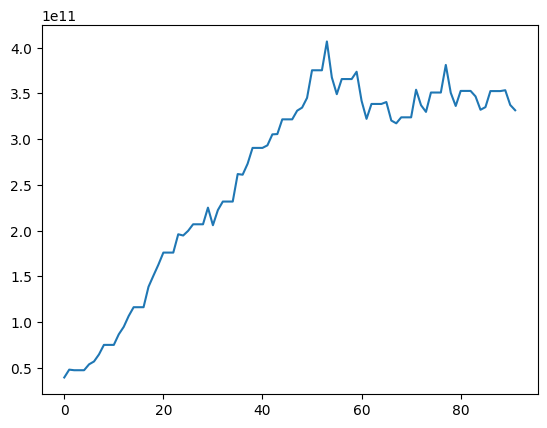

In [47]:
assets10Q['val'].plot()

In [48]:
import requests

def fetch_sec_data(ticker):
    base_url = f"https://www.sec.gov/cgi-bin/browse-edgar?CIK={ticker}&action=getcompany"
    response = requests.get(base_url, headers = headers)
    if response.status_code == 200:
        return response.text
    else:
        return None


In [49]:
result = fetch_sec_data(cik)
result


'<!doctype html>\n<html lang="en">\n\n<head>\n    <!-- Required meta tags -->\n    <meta charset="utf-8">\n    <meta name="viewport" content="width=device-width, initial-scale=1, shrink-to-fit=no">\n\n    <meta http-equiv="Content-Type" content="text/html; charset=ISO-8859-1">\n    <meta http-equiv="X-UA-Compatible" content="IE=11">\n    \n    <!-- Bootstrap CSS -->\n    <style>\n        .hidden {\n            display: none;\n        }\n    </style>\n    <!-- Get CIK file -->\n    <script>\n        const environment = \'PROD\';\n        // const apiEndPoint = "https://zaad75c6y0.execute-api.us-east-1.amazonaws.com/Dev"; // ** Dev\n        // const apiEndPoint = "https://data-test.sec.gov"; // ** Stage AKAMAI\n        const apiEndPoint = "https://data.sec.gov";\n        const submissionHeaderJSON = apiEndPoint + "/submissions/CIK{cik}.json";\n\n        function getURLParameter(name) {\n            // *** Doesn\'t work in IE 11 ***\n            // const params = new URLSearchParams(windo

In [50]:
test_url = 'https://www.sec.gov/cgi-bin/browse-edgar?CIK=0000320193&action=getcompany'
test_url

'https://www.sec.gov/cgi-bin/browse-edgar?CIK=0000320193&action=getcompany'

In [51]:
def parse_filings(html_data):
    soup = BeautifulSoup(html_data, 'html.parser')
    filings = []
    for row in soup.find_all('tr')[1:]:  # Skip the header
        cols = row.find_all('td')
        if cols:
            filings.append({
                'date': cols[3].text.strip(),
                'type': cols[0].text.strip(),
                'link': "https://www.sec.gov" + cols[1].a['href'] if cols[1].a else None
            })
    return filings

In [52]:
parse_filings(result)

[]

In [53]:
def get_filings(ticker):
    html_data = fetch_sec_data(ticker)
    if html_data:
        return parse_filings(html_data)
    return []

In [54]:
get_filings(cik)

[]